# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [9]:
# Code Here
#!pip install palmerpenguins
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from palmerpenguins import load_penguins
from plotnine import *

# Load the dataset
penguin = load_penguins()
penguin = penguin.dropna()
# Print the first few rows of the dataset
penguin.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [13]:
#Suppose we want to predict bill_depth_mm using the other variables in the dataset.
#Dummify all variables that require this.
penguin_dummies = pd.get_dummies(penguin, columns=['species', 'island', 'sex'])
penguin_dummies.head()
y = penguin_dummies['bill_depth_mm']

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [18]:
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
penguin = load_penguins()
penguin = penguin.dropna()

# Define the target variable
y = penguin['bill_depth_mm']

# Define predictor sets for the four models
X1 = penguin[['bill_length_mm']]  # Model 1: Only bill_length_mm
X2 = penguin[['bill_length_mm', 'flipper_length_mm']]  # Model 2: bill_length_mm and flipper_length_mm
X3 = penguin[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]  # Model 3: bill_length_mm, flipper_length_mm, and body_mass_g
X4 = penguin[['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species', 'island', 'sex']]  # Model 4: All features including categorical

# Create dummy variables for categorical features in Model 4
X4 = pd.get_dummies(X4, columns=['species', 'island', 'sex'], drop_first=True)

# List of models and their corresponding X sets
models = {
    "Model 1": X1,
    "Model 2": X2,
    "Model 3": X3,
    "Model 4": X4
}

# Store results for each model
results = {}

# Fit each model and calculate MSE and R² score
for model_name, X in models.items():
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Initialize and fit the linear regression model
    lr = LinearRegression()
    lr_fit = lr.fit(X_train, y_train)

    # Predict the training and test data
    train_pred_lr = lr.predict(X_train)
    test_pred_lr = lr.predict(X_test)

    # Calculate Mean Squared Error and R² Score for both training and test sets
    train_mse = mean_squared_error(y_train, train_pred_lr)
    test_mse = mean_squared_error(y_test, test_pred_lr)

    train_r2 = r2_score(y_train, train_pred_lr)
    test_r2 = r2_score(y_test, test_pred_lr)

    # Store results in the dictionary
    results[model_name] = {
        "Training MSE": train_mse,
        "Test MSE": test_mse,
        "Training R²": train_r2,
        "Test R²": test_r2
    }

# Print the results for all models
for model, metrics in results.items():
    print(f"\n{model}:")
    print(f"Training Mean Squared Error: {metrics['Training MSE']:.4f}")
    print(f"Test Mean Squared Error: {metrics['Test MSE']:.4f}")
    print(f"Training R² Score: {metrics['Training R²']:.4f}")
    print(f"Test R² Score: {metrics['Test R²']:.4f}")



Model 1:
Training Mean Squared Error: 3.6519
Test Mean Squared Error: 3.7321
Training R² Score: 0.0534
Test R² Score: 0.0076

Model 2:
Training Mean Squared Error: 2.2900
Test Mean Squared Error: 2.8500
Training R² Score: 0.4064
Test R² Score: 0.2422

Model 3:
Training Mean Squared Error: 2.2729
Test Mean Squared Error: 2.8506
Training R² Score: 0.4108
Test R² Score: 0.2420

Model 4:
Training Mean Squared Error: 0.5464
Test Mean Squared Error: 0.8345
Training R² Score: 0.8584
Test R² Score: 0.7781


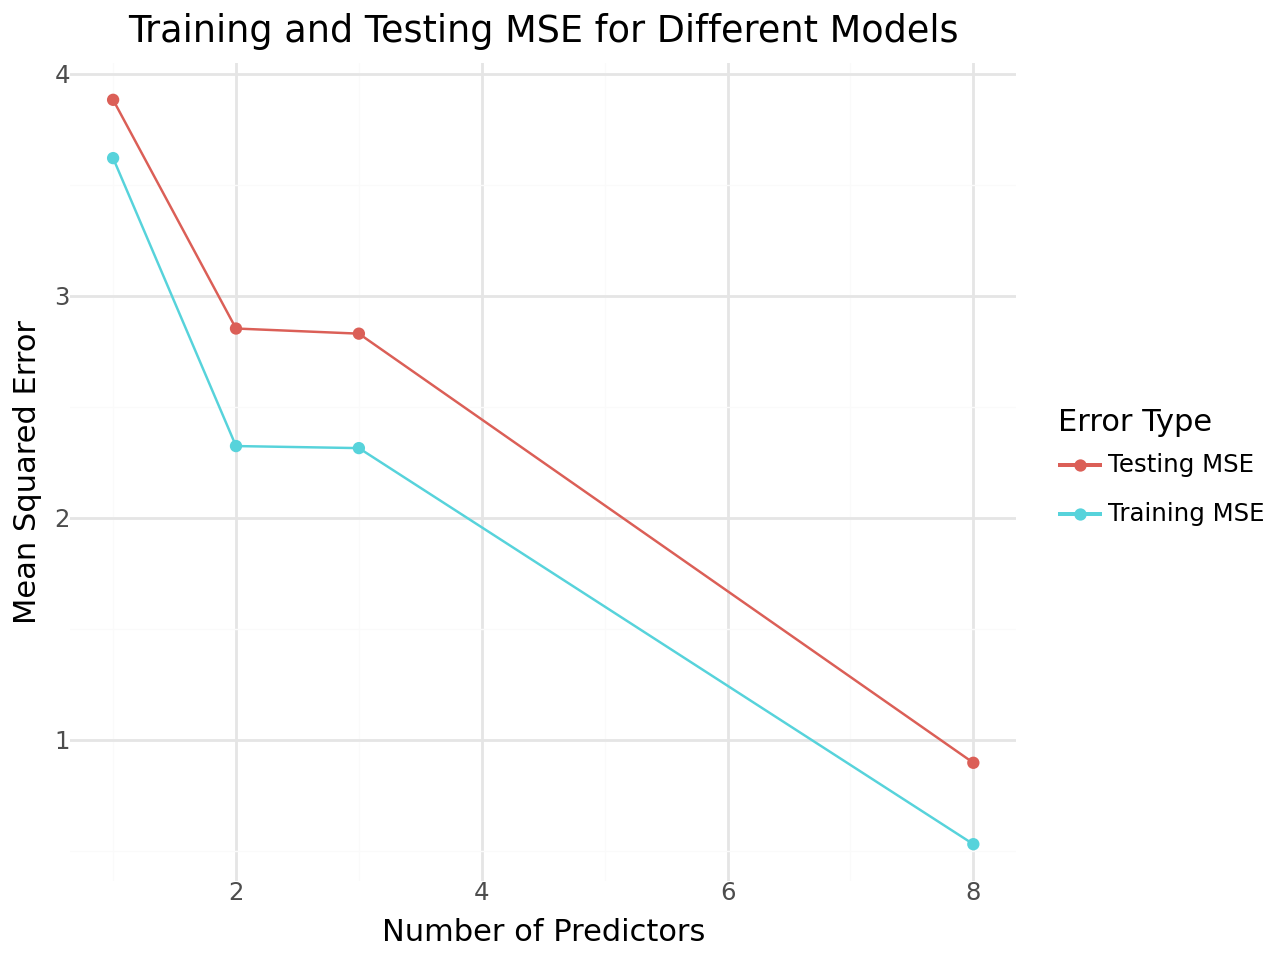

In [26]:
plot_data = pd.DataFrame({
    'num_predictors': [1, 2, 3, 8],
    'Training MSE': [train_mse1, train_mse2, train_mse3, train_mse4],
    'Testing MSE': [test_mse1, test_mse2, test_mse3, test_mse4]
})

# Melt the dataframe to have a column for 'Error Type'
plot_data_melted = plot_data.melt(id_vars='num_predictors', var_name='Error Type', value_name='MSE')

# Create the plot
(
    ggplot(plot_data_melted, aes(x='num_predictors', y='MSE', color='Error Type')) +
    geom_line() +
    geom_point() +
    labs(title='Training and Testing MSE for Different Models', x='Number of Predictors', y='Mean Squared Error') +
    theme_minimal()
)